In [1]:
import os
import sys
import numpy as np
import pylab as pl

%pylab inline

from IPython.display import Image
#Image(filename='../plotsforclasses/NYCReentryprogram_title.png')



Populating the interactive namespace from numpy and matplotlib


# START WITH Z TEST

** the z test compares the stanrard deviation of the expected distribution and the observed result. it tells you literally how many standard deviations from the tail an observation is, under the _assumption of normality_ **


** standard deviation of the sampling distribution the distribution is Binomial, the binomial stdev is **

(see a proof here!: http://stats.stackexchange.com/questions/29641/standard-error-for-the-mean-of-a-sample-of-binomial-random-variables!): 

$\sqrt{\frac{p(1 - p)}{n}}$

for 2 samples this becomes 

$\sqrt{ \frac{ \hat{p}(1 - \hat{p})} {n0} + \frac{ \hat{p}(1 - \hat{p})} {n1} }$

cfr: page 138 of Statistics in a Nutshell, eq. 5.12 and here http://stattrek.com/hypothesis-test/difference-in-proportions.aspx?Tutorial=AP

** $\hat{p} =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$ **


Note that in the online version of Statistics in a Nutshell, $\bar{x}$  should be  $\hat{p}$!!

** z score: how many standard deviation away from the population parameter is my statistic? **

 $z=\frac{P_1-P_0}{\sigma}$

note that using p0-p1 or p1-p0 at the numerator is equivalent because the standardizes normal value of z has mean 0 (see image below) so that we can use the absolute value of the z score, or equivalently look for $P[Z<z]$ if z is positive, and $P[Z>z]$ if z is negative.

* if $p<\alpha$ : reject H0 **

IMPORTANT!! note that this P in the bottom line of the table is not the p-value, but 

p-value = 1-P

# what if we used the values for where the former inmate was or was not "Convicted of a felony" (row 10) in the Recidivism (Years 1-3)?
## ANSWER:

**Null hypothesis**: the percentage of former prisoners convicted of a felony during the three-year follow-up period is the same or higher for candidates who participated in the program as for the control group, significance level p=0.05
 
**$H_0: P_0 - P_1 <=0$**
 
**$H_a: P_0 - P_1 > 0$**

$P_0$ = former prisoner who didn't participate in the program convicted of a felony, $P_0$ = 0.117 
 
$P_1$ = former prisoner who participated in the program convicted of a felony, $P_1$ = 0.10 
 
** $\alpha$ = 0.05 **

In [2]:
alpha = 0.05

p_0 = 11.7 * 0.01
p_1 = 10.0 * 0.01

if p_0 - p_1 <= 0:
    print("The Null hypothesis holds")
else:
    print("We must assess the statistic significance")

n_0 = 409
n_1 = 568

We must assess the statistic significance


In [3]:
z = lambda p0, p1, std : (p0 - p1) / std
std = lambda p, n0, n1 : np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1))
p = lambda p0, p1, n0, n1 : (p0 * n0 + p1 * n1) / (n0 + n1)

z_3y = z (p_0, p_1, std(p(p_0, p_1, n_0, n_1), n_0, n_1))
print (z_3y)


0.8476402052199316


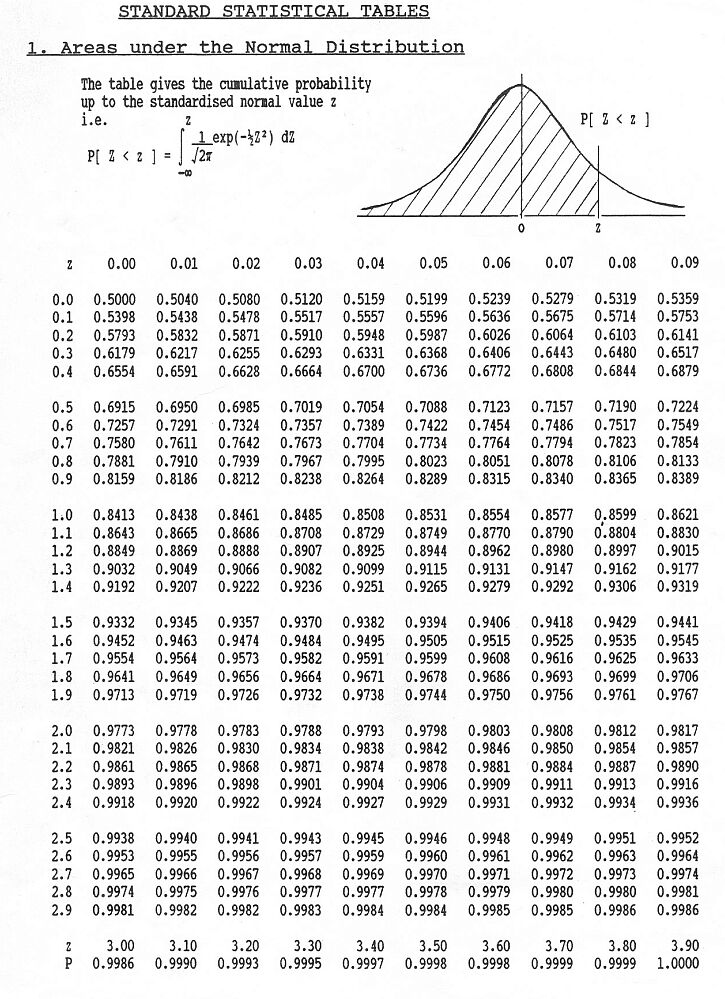

In [4]:
Image('http://intersci.ss.uci.edu/wiki/images/3/3a/Normal01.jpg')

**Through the table above, P[Z<0.85] = 0.8023**

In [5]:
p_3y= 1 - 0.8023
print ('the p-value is %s \n' %p_3y)

def report_result (p, al):
    print ('if the p-value {0:.2f} is smaller than the critical value {1:0.2f}?'.format(p, al))
    if p <= al:
        print('Yes. So reject Null Hypothesis.')
    else:
        print('No. So cannot reject Null Hypothesis.')

report_result(p_3y, alpha)
    

the p-value is 0.1977 

if the p-value 0.20 is smaller than the critical value 0.05?
No. So cannot reject Null Hypothesis.


# Now lets do it with the $\chi^2$ test

** The chisq statistics tests the statistics calculated as : **

$\chi^2 = \sum_{i} \frac{(observation_i - expectation_i)^2}{expectation_i}$

 against a chi sq distribution.
 If we talk about sample fractions  that is 

$\chi^2 = \sum_i \frac{(f_{i,observed} - f_{i,expectated})^2}{f_{i,expected}}$

 Where _i_ indicates the sum over _each cell_.
 turns out this quantity is distributed according to a chi square distribution, so if i get the $\chi^2$ statistics i can compare it to the full chisq distribution and see how far in the tail it is

 The trickiest part (but not that tricky) is to figure out how to construct the table of values. please see Statistics In a Nutshell Chapter 4, for our data for example: Thisis called a CONTINGENCY TABLE

|                 |     success         | failure|    |               
|-----------------|:-------------------:|:-------------------:|---------------------------|
| test sample     | number of successes in test    | number of failures in test    | number members of test sample |
| control sample  | number of successes in control | number of failures in control | number members of control sample| 
|                 | total successes                |  total failures               | number of all members         |

|employed in subsadized job |     employed          | not employed     |                   
|---------------------------|:---------------------:|------------------|---------------------------|
| test sample               | $0.701*564$           | $0.299*564$      | 564                       |
| control sample            | $0.035*409$           | $0.965*4.09$     | 409                       |
|                           |                       |                  |                           |
| total                     | 409.679               |  562.912         | 973                       |

 for each cell the expected ratio is the product of the total of all rows and all columns, devided by the total

** FOR EACH CELL: **
**  expected_cell = $\frac{row~tot * col~tot}{total}$ **


In [48]:
def evalChisq(values):
    '''Evaluates the chi sq from a contingency value
    Arguments:
    values: 2x2 array or list, the contingengy table
    '''
    if not (len(values.shape) == 2 and values.shape == (2,2)):
        print ("must pass a 2D array")
        return -1
    values = np.array(values)
    E = np.empty_like(values)
    for j in range(len(values[0])):
        for i in range(2):
            
            E[i][j] = ((values[i,:].sum() * values[:,j].sum()) / 
                        (values).sum())
    return ((values - E)**2 / E).sum()

In [50]:
sample_values = np.array([[0.701 * 564, 0.299 * 564], [0.0305 * 409, 0.965 * 409]])

evalChisq(sample_values)

436.22346257536003

This number must be compared to the chi sq distribution. 
You must calculate the number of degrees of freedom forthis experiment. 
Generally: DOF = Number of observations - number of Independent Variables

so here DOF = 1. Now you can look at the table below and draw conclusions about the rejection of the Null

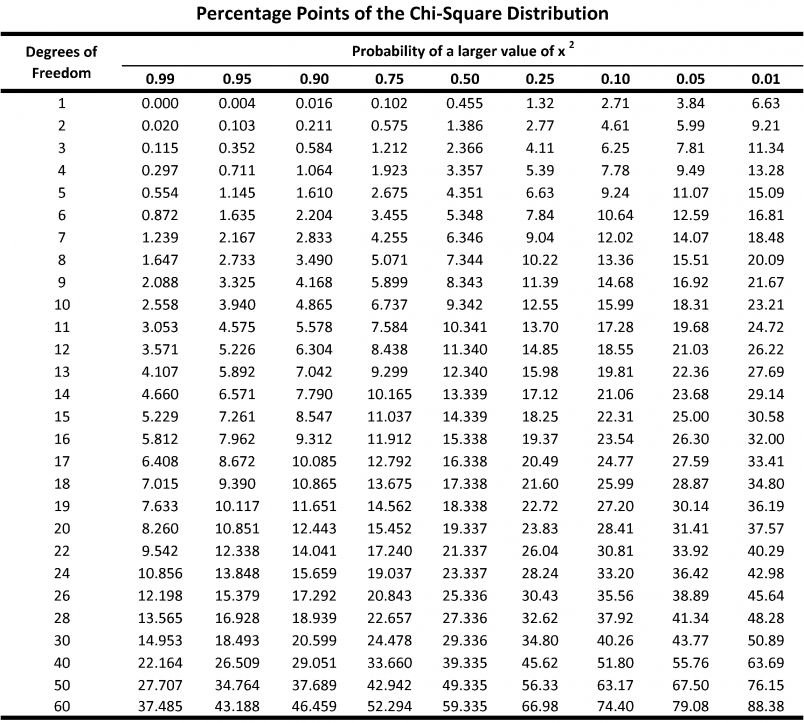

In [51]:
Image("http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG")

432 is hella larger then 3.84

why am i mentioning 3.84?

how does the chi square statistic that you derived compare?

please  state what that means in terms of your Null hypothesis in a markdown cell below!

# Answer:
The DOF=1, and significance level is 0.05, so we search the critical value based on these two number in the table, and got the critical value 3.84. This means that the probability to get as extreme as 3.84 is 95%, under the 1 DOF. Since 436 is extremly larger then 3.84, we have at least 95% confidence to say that reject Null hypothesis is true. So reject Null hypothesis. 

# !!!!!! TODO FOR YOU!
lets see what the chi sq statistics says about the conviction for fellonies (row 10)

* fill in the contingency table below *

|convicted of a fellony     |     yes   | no        |    total               
|---------------------------|-----------|-----------|----------------|
| test sample               |0.10*568     |0.90*568           |      568       |
| control sample            |0.117*409           |0.883*409           |      409       |
|                           |           |           |                |
| total                     |104.653           |872.347           |      977       |

continue...

In [52]:
conviction_values = np.array([[0.10 * 568, 0.90 * 568], [0.117 * 409, 0.883 * 409]])

evalChisq(conviction_values)

0.7184939175052887

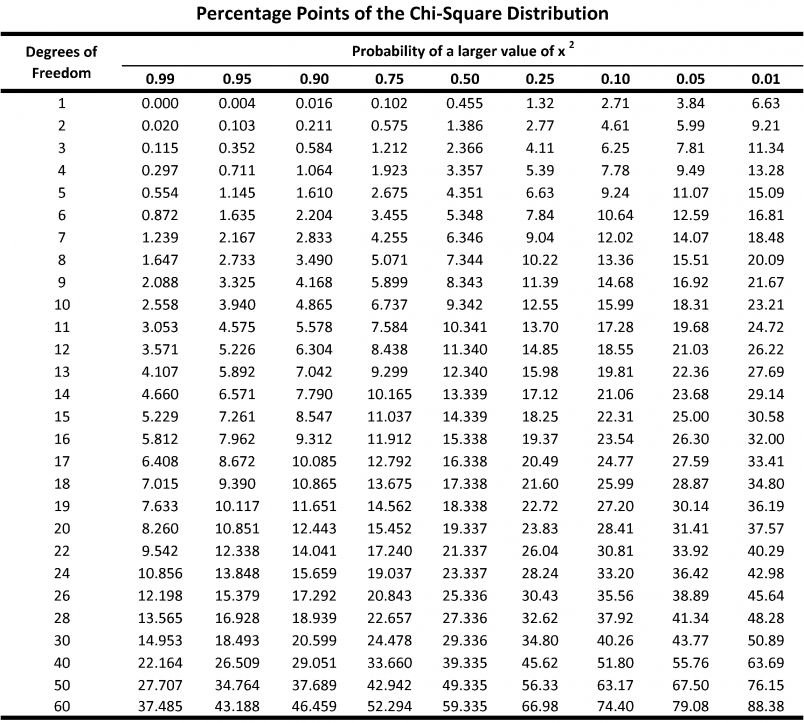

In [53]:
Image("http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG")

# Summary:
Under the DOF =1 and $\alpha$ = 0.05, the chi-square = 3.84
since 0.72 is significantly less than 3.84, we cannot reject Null hypothesis.